In [36]:
import scipy.io
import numpy as np
import pandas as pd
import cv2
import glob

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Import classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# metrics contain our plot_confustion_matrix and classification_report
from sklearn import metrics

# Helper fuction to splitting data
from sklearn.model_selection import train_test_split



In [13]:
#importing images with glob 

#pip install opencv-python
import cv2
import glob

imdir = 'aligned/'

files = []
[files.extend(glob.glob(imdir + '*.jpg'))] #arbitrary ordering of files 
files = sorted(files) # to get back file ordering
images = [cv2.imread(file) for file in files]


files_df = pd.DataFrame(files)

files_df.set_axis(['file_name'], axis =1 , inplace = True )

replace = ['aligned/', '_aligned' ]

files_df['file_name'] = files_df['file_name'].replace(replace , '' , regex = True )


In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY)

images_gray = [cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY) for i in range(len(images)) ]


#plt.imshow(images_gray[0], cmap = 'gray') display image 

print( 'rbg shape:' , images[0].flatten().shape , 'gray shape:', images_gray[0].flatten().shape)

flatten_gray = [images_gray[i].flatten() for i in range(len(images_gray))]

flatten_df = pd.DataFrame(flatten_gray)

flatten_df.insert(0, 'file_name' , files_df)

rbg shape: (30000,) gray shape: (10000,)


In [15]:
import pandas as pd

df_list_patition_label = pd.read_csv("list_patition_label.txt", sep = " ", header = None) #Reading the file list_partition_label; make sure to have this file in the same folder as the python code file

#class_balance = df.groupby(1).nunique()
#class_balance.columns = ["Count"]
#class_balance

df_list_patition_label.set_axis(['file_name', 'expressions'], axis =1 , inplace = True )


In [16]:
result = pd.merge(df_list_patition_label, flatten_df , on='file_name')

result

,file_name,expressions,0,1,2,3,4,5,6,7,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,train_00001.jpg,5,71,101,74,66,82,55,84,50,...,173,174,174,173,173,172,173,175,177,177
1,train_00002.jpg,5,11,11,37,1,12,27,32,35,...,31,33,17,17,18,24,10,13,18,23
2,train_00003.jpg,4,9,13,14,14,22,32,30,20,...,215,215,215,215,215,215,213,213,213,212
3,train_00004.jpg,4,50,33,17,20,36,50,50,45,...,224,222,219,215,213,212,213,211,207,204
4,train_00005.jpg,5,23,20,21,29,39,43,38,30,...,52,64,79,103,165,208,227,160,159,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15334,test_3064.jpg,7,145,93,103,116,94,90,106,129,...,73,85,80,56,32,20,34,43,51,47
15335,test_3065.jpg,7,97,99,120,153,170,168,172,184,...,60,76,77,70,73,80,85,83,76,68
15336,test_3066.jpg,7,49,47,49,54,61,65,63,60,...,38,40,42,42,40,37,35,37,39,42
15337,test_3067.jpg,7,146,148,149,150,150,152,155,158,...,119,121,123,125,128,131,130,130,129,129


In [17]:
result.to_csv(r'Facial_Expression_DF.csv', index = False)

In [18]:
df = pd.read_csv('Facial_Expression_DF.csv')

df.head()

,file_name,expressions,0,1,2,3,4,5,6,7,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,train_00001.jpg,5,71,101,74,66,82,55,84,50,...,173,174,174,173,173,172,173,175,177,177
1,train_00002.jpg,5,11,11,37,1,12,27,32,35,...,31,33,17,17,18,24,10,13,18,23
2,train_00003.jpg,4,9,13,14,14,22,32,30,20,...,215,215,215,215,215,215,213,213,213,212
3,train_00004.jpg,4,50,33,17,20,36,50,50,45,...,224,222,219,215,213,212,213,211,207,204
4,train_00005.jpg,5,23,20,21,29,39,43,38,30,...,52,64,79,103,165,208,227,160,159,177


In [19]:
#check for nulls
df.isnull().sum().sum()

0

In [20]:
#check for dups
df.duplicated().sum()

0

#### Expressions Classes 

surprise = 1, fear = 2 , disgust = 3 , happiness = 4 , sadness = 5 , anger = 6 and neutral = 7

In [22]:
#class balance 
df.expressions.value_counts(), df.expressions.value_counts(normalize=True)

(4    5957
 7    3204
 5    2460
 1    1619
 3     877
 6     867
 2     355
 Name: expressions, dtype: int64,
 4    0.388356
 7    0.208879
 5    0.160376
 1    0.105548
 3    0.057175
 6    0.056523
 2    0.023144
 Name: expressions, dtype: float64)

In [31]:
#Feature Engineering 

selected_features = df.columns
# print(type(selected_features)) = <class 'pandas.core.indexes.base.Index'>
selected_features = list(selected_features) # a list of all the cols

#selected_features = Sanity check

#remove the file_name and the expressions col (our y value)

remove_feature = ['file_name', 'expressions' ]
selected_features.remove('file_name')
selected_features.remove('expressions')

# selected_features #0-999 pixels of the image

In [32]:
# define x and y 

X = df[selected_features]

y = df['expressions']


In [37]:
#train and test slips 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [38]:
#build and train the model

from sklearn import svm

# Initalize our Support Vector Classifier
model = svm.SVC()

In [39]:
#fit the model

model.fit(X_train, y_train)

SVC()

In [44]:
accuracy = model.score(X_test, y_test)
print("Accuracy %f" % accuracy)

Accuracy 0.658149


In [40]:
y_pred = model.predict(X_test)


In [41]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.55      0.64       404
           2       0.84      0.20      0.32        81
           3       0.47      0.04      0.07       206
           4       0.73      0.91      0.81      1469
           5       0.59      0.42      0.49       621
           6       0.67      0.32      0.43       219
           7       0.54      0.74      0.63       835

    accuracy                           0.66      3835
   macro avg       0.66      0.45      0.48      3835
weighted avg       0.65      0.66      0.63      3835



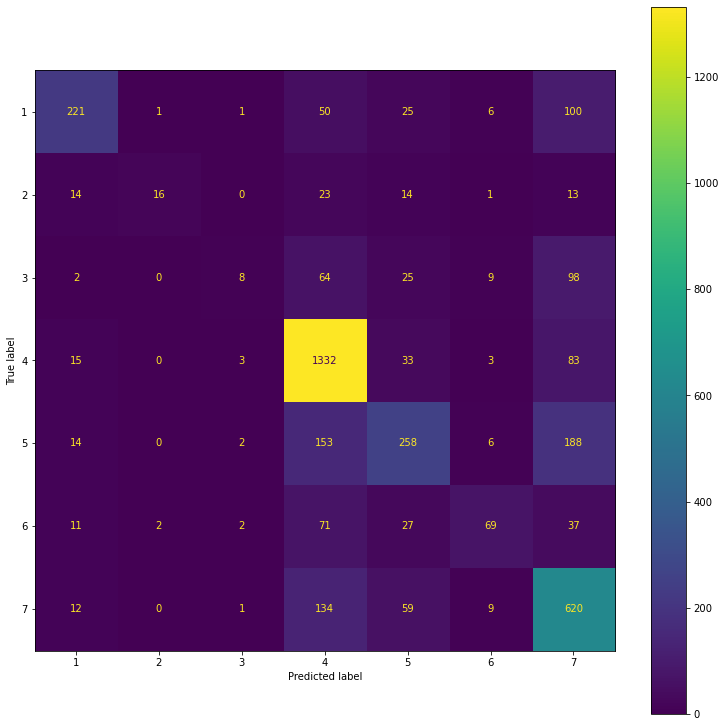

In [43]:
fig, ax = plt.subplots(figsize=(13,13))
metrics.plot_confusion_matrix(estimator=model, 
                              X=X_test, 
                              y_true=y_test, 
                              ax=ax)

In [46]:
def build_and_eval_model(model, X, y, random_state=23):
    print("Running report for model", model)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=random_state)    
    
    # Fit our model.
    model.fit(X_train, y_train)
    
    # Get the accuracy
    accuracy = model.score(X_test, y_test)
    print("\n\nAccuracy %f" % accuracy)
    
    
    # Make new predictions
    y_pred = model.predict(X_test)
    
    
    # Print the classification report. 
    print(metrics.classification_report(y_test, y_pred))
    
        
    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(13,13))
    
    metrics.plot_confusion_matrix(estimator=model, 
                                  X=X_test, 
                                  y_true=y_test, 
                                  ax=ax)

    # Return the fitted model. 
    return model

Running report for model RandomForestClassifier()


Accuracy 0.602868
              precision    recall  f1-score   support

           1       0.68      0.36      0.47       397
           2       0.86      0.16      0.27        75
           3       0.70      0.03      0.06       224
           4       0.68      0.89      0.77      1550
           5       0.47      0.31      0.37       595
           6       0.70      0.11      0.19       193
           7       0.50      0.71      0.59       801

    accuracy                           0.60      3835
   macro avg       0.65      0.37      0.39      3835
weighted avg       0.61      0.60      0.56      3835



RandomForestClassifier()

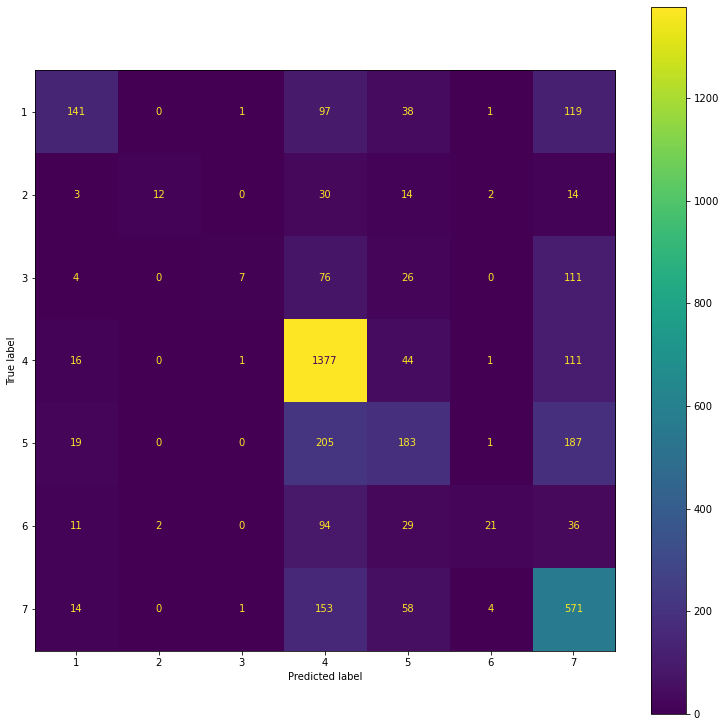

In [47]:
rf = RandomForestClassifier()

build_and_eval_model(rf, X, y)

Running report for model MultinomialNB()


Accuracy 0.299609
              precision    recall  f1-score   support

           1       0.43      0.26      0.32       397
           2       0.04      0.52      0.07        75
           3       0.14      0.14      0.14       224
           4       0.72      0.35      0.47      1550
           5       0.26      0.34      0.29       595
           6       0.15      0.28      0.20       193
           7       0.37      0.23      0.28       801

    accuracy                           0.30      3835
   macro avg       0.30      0.30      0.25      3835
weighted avg       0.47      0.30      0.35      3835



MultinomialNB()

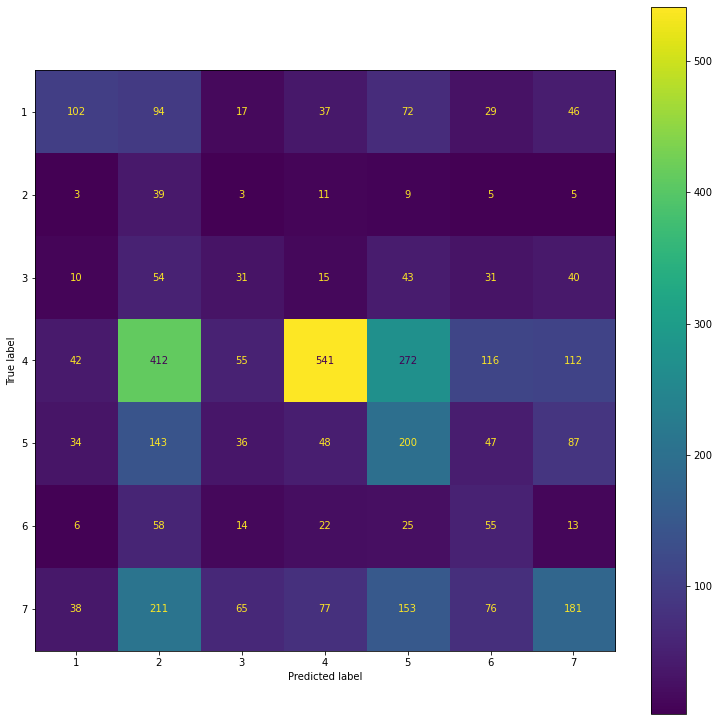

In [48]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
build_and_eval_model(mnb, X, y)

Running report for model SVC()


Accuracy 0.652934
              precision    recall  f1-score   support

           1       0.71      0.49      0.58       397
           2       0.84      0.21      0.34        75
           3       0.68      0.07      0.12       224
           4       0.74      0.89      0.81      1550
           5       0.56      0.41      0.48       595
           6       0.57      0.28      0.38       193
           7       0.53      0.74      0.62       801

    accuracy                           0.65      3835
   macro avg       0.66      0.44      0.47      3835
weighted avg       0.66      0.65      0.62      3835



SVC()

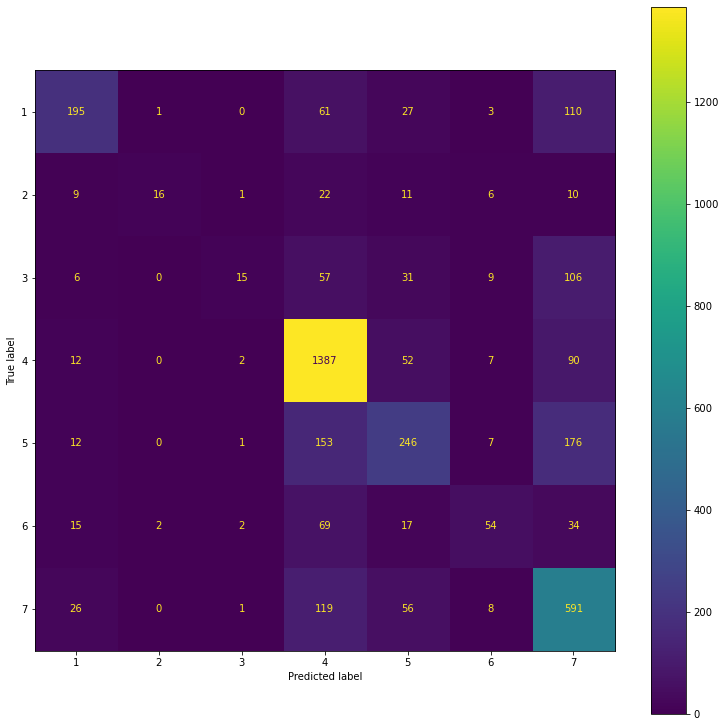

In [49]:
svm = svm.SVC()
build_and_eval_model(svm, X, y)


In [ ]:
lr = LogisticRegression()
build_and_eval_model(lr, X, y)


In [ ]:
lsvc = svm.LinearSVC()

build_and_eval_model(lsvc, X, y)

In [ ]:
# extra features from mathlab files 

HOG = scipy.io.loadmat('HOG.mat') 
DLP_CNN = scipy.io.loadmat('DLP-CNN.mat')
baseDCNN = scipy.io.loadmat('baseDCNN.mat')
Gabor = scipy.io.loadmat('Gabor.mat') 


Gabor_train = pd.DataFrame(Gabor['GAB_train'])
Gabor_train

Gabor_test = pd.DataFrame(Gabor['GAB_test'])
Gabor_test

baseDCNN_train = pd.DataFrame(baseDCNN['baseDCNN_train'])
baseDCNN_train

baseDCNN_test = pd.DataFrame(baseDCNN['baseDCNN_test'])
baseDCNN_tes

HOG_train = pd.DataFrame(HOG['HOG_train'])
HOG_train

HOG_test = pd.DataFrame(HOG['HOG_test'])
HOG_test

DLP_CNN_train = pd.DataFrame(DLP_CNN['DLP_train'])
DLP_CNN_train

DLP_CNN_test = pd.DataFrame(DLP_CNN['DLP_test'])
DLP_CNN_test

